In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [3]:
df = pd.read_csv("moore.csv",header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [4]:
data = df.values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

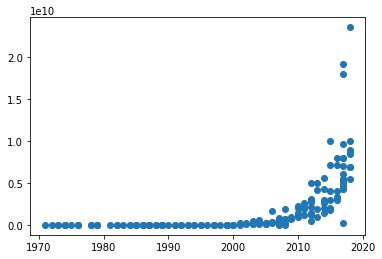

In [5]:
plt.scatter(X,Y)

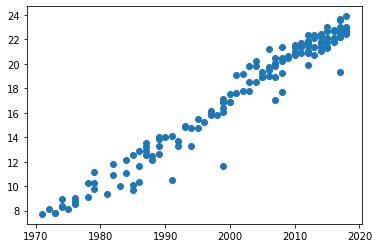

In [6]:
Y = np.log(Y)
plt.scatter(X,Y)

In [7]:
X = X - X.mean()

In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1,activation='relu')
    ]
)

model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9),
    loss = 'mse',
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
r = model.fit(X,Y,epochs=100)

Train on 162 samples
Epoch 1/100
162/162 [==============================] - 0s 1ms/sample - loss: 314.7645
Epoch 2/100
162/162 [==============================] - 0s 188us/sample - loss: 201.5099
Epoch 3/100
162/162 [==============================] - 0s 55us/sample - loss: 189.3413
Epoch 4/100
162/162 [==============================] - 0s 205us/sample - loss: 140.1980
Epoch 5/100
162/162 [==============================] - 0s 182us/sample - loss: 124.1660
Epoch 6/100
162/162 [==============================] - 0s 96us/sample - loss: 109.7172
Epoch 7/100
162/162 [==============================] - 0s 109us/sample - loss: 103.5699
Epoch 8/100
162/162 [==============================] - 0s 81us/sample - loss: 102.3020
Epoch 9/100
162/162 [==============================] - 0s 180us/sample - loss: 101.3365
Epoch 10/100
162/162 [==============================] - 0s 118us/sample - loss: 100.1385
Epoch 11/100
162/162 [==============================] - 0s 90us/sample - loss: 100.8261
Epoch 12/100
16

Epoch 95/100
162/162 [==============================] - 0s 78us/sample - loss: 1.2618
Epoch 96/100
162/162 [==============================] - 0s 73us/sample - loss: 1.1906
Epoch 97/100
162/162 [==============================] - 0s 88us/sample - loss: 1.0413
Epoch 98/100
162/162 [==============================] - 0s 103us/sample - loss: 1.1141
Epoch 99/100
162/162 [==============================] - 0s 91us/sample - loss: 0.9428
Epoch 100/100
162/162 [==============================] - 0s 66us/sample - loss: 0.9304


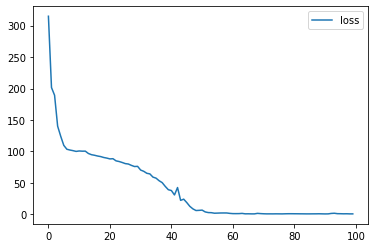

In [10]:
plt.plot(r.history['loss'],label='loss')
plt.legend()
plt.show()

## Using Scheduler for learning rate

In [16]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1,activation='relu')
    ]
)

model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9),
    loss = 'mse',
)


def schedule(epoch):
    if epoch >= 50:
        return 0.0001
    return 0.001

In [17]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [18]:
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 671us/sample - loss: 308.3146
Epoch 2/200
162/162 [==============================] - 0s 171us/sample - loss: 306.7264
Epoch 3/200
162/162 [==============================] - 0s 59us/sample - loss: 304.9415
Epoch 4/200
162/162 [==============================] - 0s 60us/sample - loss: 304.0991
Epoch 5/200
162/162 [==============================] - 0s 194us/sample - loss: 300.6025
Epoch 6/200
162/162 [==============================] - 0s 88us/sample - loss: 299.7895
Epoch 7/200
162/162 [==============================] - 0s 77us/sample - loss: 299.1408
Epoch 8/200
162/162 [==============================] - 0s 57us/sample - loss: 296.1190
Epoch 9/200
162/162 [==============================] - 0s 95us/sample - loss: 294.1881
Epoch 10/200
162/162 [==============================] - 0s 74us/sample - loss: 289.6343
Epoch 11/200
162/162 [==============================] - 0s 101us/sample - loss: 249.7956
Epoch 12/200
162

162/162 [==============================] - 0s 60us/sample - loss: 1.0611
Epoch 96/200
162/162 [==============================] - 0s 58us/sample - loss: 1.0444
Epoch 97/200
162/162 [==============================] - 0s 55us/sample - loss: 1.0448
Epoch 98/200
162/162 [==============================] - 0s 59us/sample - loss: 1.0420
Epoch 99/200
162/162 [==============================] - 0s 67us/sample - loss: 1.0357
Epoch 100/200
162/162 [==============================] - 0s 58us/sample - loss: 1.0300
Epoch 101/200
162/162 [==============================] - 0s 56us/sample - loss: 1.0250
Epoch 102/200
162/162 [==============================] - 0s 59us/sample - loss: 1.0298
Epoch 103/200
162/162 [==============================] - 0s 63us/sample - loss: 1.0162
Epoch 104/200
162/162 [==============================] - 0s 67us/sample - loss: 1.0154
Epoch 105/200
162/162 [==============================] - 0s 56us/sample - loss: 1.0160
Epoch 106/200
162/162 [==============================] - 0s 5

162/162 [==============================] - 0s 58us/sample - loss: 0.8919
Epoch 190/200
162/162 [==============================] - 0s 78us/sample - loss: 0.8928
Epoch 191/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8913
Epoch 192/200
162/162 [==============================] - 0s 71us/sample - loss: 0.8980
Epoch 193/200
162/162 [==============================] - 0s 78us/sample - loss: 0.9426
Epoch 194/200
162/162 [==============================] - 0s 76us/sample - loss: 0.9153
Epoch 195/200
162/162 [==============================] - 0s 64us/sample - loss: 0.8904
Epoch 196/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8968
Epoch 197/200
162/162 [==============================] - 0s 66us/sample - loss: 0.8928
Epoch 198/200
162/162 [==============================] - 0s 59us/sample - loss: 0.8936
Epoch 199/200
162/162 [==============================] - 0s 69us/sample - loss: 0.9005
Epoch 200/200
162/162 [==============================] -

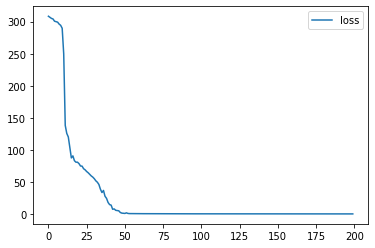

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.legend()
plt.show()